# Lista 5

## Uczenie maszynowe i sztuczna inteligencja

## Wstęp
Na tej liście przejdziemy już do wykorzystywania bardziej zaawansowanych sieci neuronowych w tym konwolucyjnych. Do konstrukcji sieci skorzystamy z Keras'a.

# Zadanie 1 (15pt)

W celu zaliczenia zadania należy uzupełnić wszystkie brakujące elementu kodu, wykonać wszystkie polecenia i wyuczyć model.



### **1. Stworzenie sieci konwolucyjnej (splotowej) i zapobieganie jej przeuczeniu z wykorzystaniem różnych metod przeciwdziałania temu zjawisku**

W pierwszym etapie przygotujmy dane do treningu - wykorzystamy zbiór Fashion MNIST.

> [Zbiór Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/)

Wczytaj zbiór danych Fashion MNIST. Ze zbioru testowego wyodrębnij 50% danych - zbiór walidacyjny.

In [149]:
# wyświetlanie wszystkich wyników z komórki (nie trzeba print(...))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [150]:
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# tutaj umieść rozwiązanie

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1, stratify=y_test)

Dostosujmy kształt danych wejściowych.

In [151]:
print(X_train.shape)
print(X_val.shape)

# uzupełnij kod
# X_train = ...
# X_val = ...

(60000, 28, 28)
(5000, 28, 28)


Zdefiniujmy teraz nasz model sieci konwolucyjnej.

In [152]:
no_of_classes = 10
(img_width, img_height, img_depth)  = (28, 28, 1)

# definicja modelu
model_simple = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=2, activation='relu', 
                           input_shape=(img_width, img_height, img_depth), padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),  # spłaszczenie danych do wykorzystania warstwy gęstej
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
  ])

model_simple.compile(
    # wybór optymalizatora
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    # miara, którą chcemy monitorować
    metrics=['accuracy']
)

# wyświetlenie architektury
model_simple.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        2336      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1568)              0         
                                                                 
 dense_20 (Dense)            (None, 128)             

W ostatnim etapie zdefiniujmy hiperparametry oraz rozpocznijmy uczenie modelu na danych treningowych. 

In [153]:
# wybór parametrów uczenia
batch_size = 32
epochs = 10
learning_rate = 0.01

In [154]:
# trening modelu 
history_simple = model_simple.fit(X_train, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(X_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7483 - accuracy: 0.8262 - val_loss: 0.3690 - val_accuracy: 0.8658
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3157 - accuracy: 0.8848 - val_loss: 0.3223 - val_accuracy: 0.8840
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9007 - val_loss: 0.3288 - val_accuracy: 0.8800
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2462 - accuracy: 0.9095 - val_loss: 0.2999 - val_accuracy: 0.8956
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2295 - accuracy: 0.9151 - val_loss: 0.2857 - val_accuracy: 0.9028
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2108 - accuracy: 0.9226 - val_loss: 0.3069 - val_accuracy: 0.8926
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1946 - accuracy: 0.9277 - val_loss: 0.3001 - val_accuracy:

Wyświetl na jednym wykresie, wykorzystując historię treningu modelu, jak
 zmieniała się dokładność dla danych treningowych i walidacyjnych. Czy 
da się zauważyć na wykresie jakąś zależność? Czy trening przebiegł w 
sposób, jaki byśmy oczekiwali?

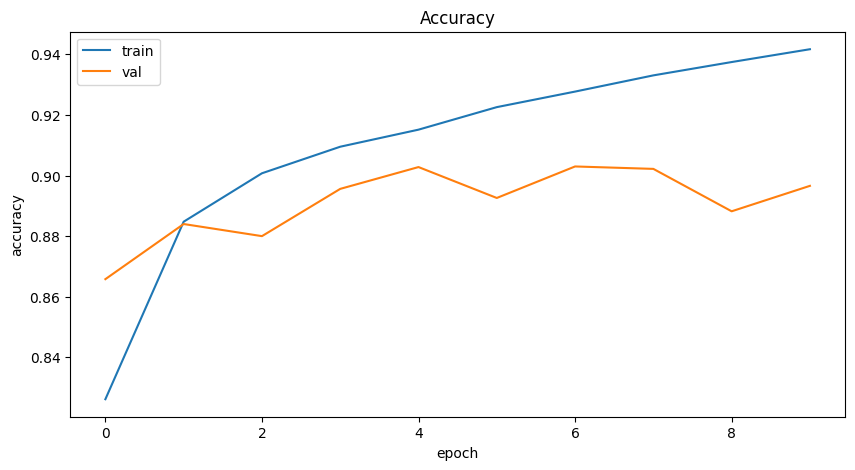

In [155]:
# tutaj umieść kod

def plot_history(history):
    plt.figure(figsize=(10,5))
    plt.plot(history['accuracy'], label='train')
    plt.plot(history['val_accuracy'], label='val')
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='upper left')
    plt.show()

plot_history(history_simple.history)

W celu poprawy wyników, które uzyskujemy oraz dodatkowo - aby zapobiegać nadmiernemu dopasowaniu do danych treningowych i uzyskiwaniu dobrej generalizacji, sprawdźmy kilka technik, które pomagają w przeciwdziałaniu przeuczeniu modelu.

Pierwszą techniką będzie **normalizacja danych**. W tym przypadku przeskalujmy dane wejściowe do zakresu od 0 do 1. 

Wykorzystując jedną z warstw przetwarzania wstępnego danych, uzupełnij 
poniższy kod tak, aby stworzyć możliwość normalizacji danych do zakresu 
0-1.

In [156]:
# tutaj umieść rozwiązanie

# definicja modelu
model_normal = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1./255, input_shape=(img_width, img_height, img_depth)),
    tf.keras.layers.Conv2D(8, kernel_size=2, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),  # spłaszczenie danych do wykorzystania warstwy gęstej
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
  ])

model_normal.compile(
    # wybór optymalizatora
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    # miara, którą chcemy monitorować
    metrics=['accuracy']
)

# wyświetlenie architektury
model_normal.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 14, 14, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 32)        2336      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 1568)            

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4389 - accuracy: 0.8448 - val_loss: 0.3372 - val_accuracy: 0.8790
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2918 - accuracy: 0.8942 - val_loss: 0.2806 - val_accuracy: 0.8976
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2500 - accuracy: 0.9080 - val_loss: 0.2784 - val_accuracy: 0.8990
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2211 - accuracy: 0.9185 - val_loss: 0.2881 - val_accuracy: 0.8956
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1995 - accuracy: 0.9261 - val_loss: 0.2434 - val_accuracy: 0.9080
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1790 - accuracy: 0.9344 - val_loss: 0.2421 - val_accuracy: 0.9126
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1641 - accuracy: 0.9386 - val_loss: 0.2768 - val_accuracy:

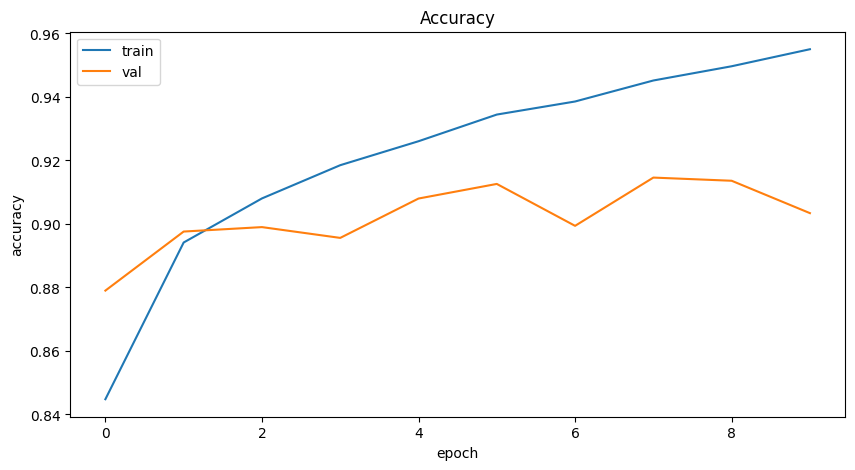

In [157]:
history_normal = model_normal.fit(X_train, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(X_val, y_val))

plot_history(history_normal.history)

Kolejną techniką, która wspomaga przeciwdziałanie przeuczeniu modelu, jest **augmentacja danych**.
 W szczególności powinna być stosowana, jeśli nasz zbiór danych zawiera 
mało przykładów treningowych - model nie może się uczyć uogólnień, które
 mógłby wykorzystać przy przetwarzaniu nowych danych. Stosując 
augmentację, sieć nie zobaczy tego samego obrazu dwukrotnie, jednak 
obrazy będą wyglądały wiarygodnie i będą do siebie zbliżone, więc będzie
 ona w stanie zwrócić uwagę na więcej aspektów przetwarzanych danych i tworzyć lepsze uogólnienia.

Wykorzystując dostępne warstwy przetwarzania wstępnego w pakiecie 
Keras, stwórz model sekwencyjny, zawierający minimum trzy operacje na 
obrazie (np. powiększenie, obrót itp.). Wykorzystując dowolny obraz ze 
zbioru testowego, pokaż trzykrotne wywołanie tego modelu na tym samym 
obrazie, aby zaprezentować losowość działania tych przekształceń.

In [158]:
#tutaj umieść rozwiązanie

# definicja modelu
model_augment = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(input_shape=(img_width, img_height, img_depth), mode="horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Conv2D(8, kernel_size=2, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),  # spłaszczenie danych do wykorzystania warstwy gęstej
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
  ])

model_augment.compile(
    # wybór optymalizatora
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    # miara, którą chcemy monitorować
    metrics=['accuracy']
)

# wyświetlenie architektury
model_augment.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_37 (RandomFlip  (None, 28, 28, 1)         0         
 )                                                               
                                                                 
 random_rotation_37 (Random  (None, 28, 28, 1)         0         
 Rotation)                                                       
                                                                 
 random_zoom_37 (RandomZoom  (None, 28, 28, 1)         0         
 )                                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 14, 14, 8)         0         
 ng2D)                                               

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1768 - accuracy: 0.7341 - val_loss: 0.7672 - val_accuracy: 0.7556
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5281 - accuracy: 0.8044 - val_loss: 0.5792 - val_accuracy: 0.8058
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4737 - accuracy: 0.8259 - val_loss: 0.6031 - val_accuracy: 0.8150
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4394 - accuracy: 0.8357 - val_loss: 0.5163 - val_accuracy: 0.8366
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4129 - accuracy: 0.8465 - val_loss: 0.5059 - val_accuracy: 0.8376
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3950 - accuracy: 0.8553 - val_loss: 0.4598 - val_accuracy: 0.8462
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3820 - accuracy: 0.8609 - val_loss: 0.4867 - val_accuracy

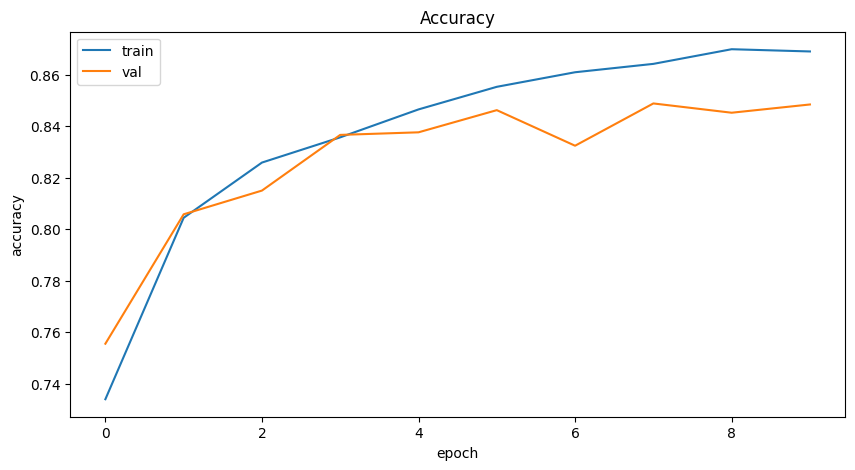

In [159]:
history_augment = model_augment.fit(X_train, y_train,
                                    epochs=epochs,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val))

plot_history(history_augment.history)

<Figure size 1000x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Original pic')

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Augmented pic 1')

(-0.5, 27.5, 27.5, -0.5)

<Axes: title={'center': 'Original pic'}>

Text(0.5, 1.0, 'Original pic')

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Augmented pic 2')

(-0.5, 27.5, 27.5, -0.5)

<Axes: title={'center': 'Original pic'}>

Text(0.5, 1.0, 'Original pic')

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Augmented pic 3')

(-0.5, 27.5, 27.5, -0.5)

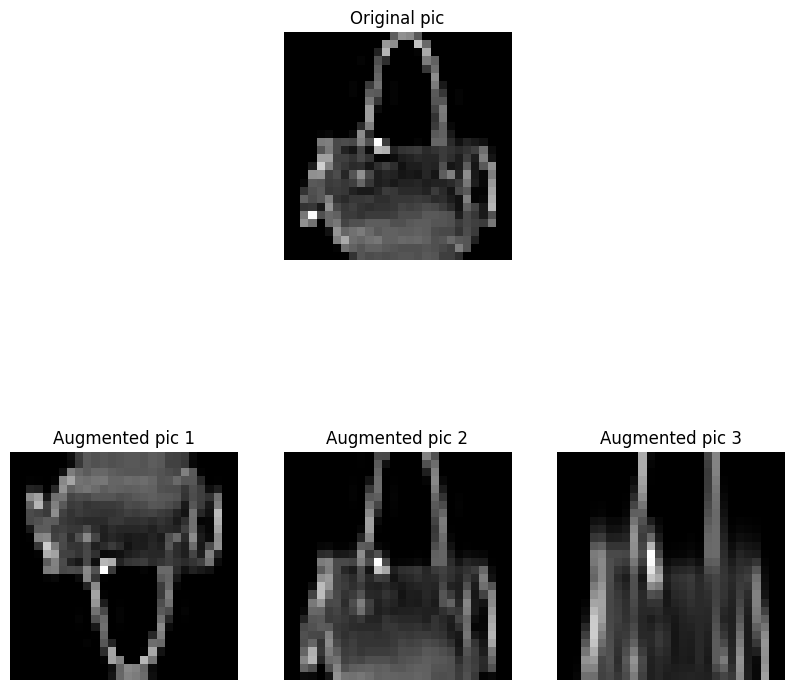

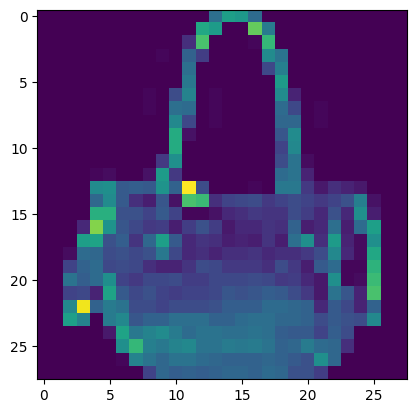

In [160]:
# definicja modelu testowego
model_augmentation_test = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
])

augmented_images = [model_augmentation_test(np.expand_dims(X_test[7], axis=0)) for _ in range(3)]
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(2, 3, 2)
    plt.imshow(X_test[7].reshape(28, 28), cmap='gray')
    plt.title("Original pic")
    plt.axis('off')
    
    # Zaugmentowane obrazy
    plt.subplot(2, 3, i + 4)
    plt.imshow(augmented_images[i][0].numpy().reshape(28, 28), cmap='gray')
    plt.title(f"Augmented pic {i+1}")
    plt.axis('off')

plt.show()
plt.imshow(X_test[7])

Kolejną z technik wykorzystywaną do zmniejszania ryzyka przeuczenia się sieci jest *dropout*, który polega na losowym wybieraniu zadanej liczby cech wyjściowych warstwy podczas trenowania - wartości tych warstw zastępuje się zerami.

> [Dokumentacja - warstwa dropout](https://keras.io/api/layers/regularization_layers/dropout/)


Wykorzystując stworzone we wcześniejszych krokach: normalizację, 
augmentację oraz dropout, stwórz nowy model modyfikując 
strukturę modelu *model_simple*.
 Przed pierwszą warstwą splotową dodaj normalizację, a następnie 
augmentację danych. Po każdej z warstw maxpooling dodaj dropout z 
prawdopodobieństwem 0.2. Wytrenuj model na danych treningowych i 
monitoruj jakie parametry uzyskiwane są dla danych walidacyjnych. 
Wyświetl także wykres zmiany miary dokładności w trakcie kolejnych epok 
uczenia dla danych walidacyjnych i treningowych. Czy zastosowanie tych technik przyniosło korzyść?

In [161]:
# tutaj umieść rozwiązanie

# definicja modelu
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1./255, input_shape=(img_width, img_height, img_depth)),
    tf.keras.layers.RandomFlip(mode="horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Conv2D(8, kernel_size=2, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),  # spłaszczenie danych do wykorzystania warstwy gęstej
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
  ])

model_dropout.compile(
    # wybór optymalizatora
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    # miara, którą chcemy monitorować
    metrics=['accuracy']
)

# wyświetlenie architektury
model_dropout.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 random_flip_39 (RandomFlip  (None, 28, 28, 1)         0         
 )                                                               
                                                                 
 random_rotation_39 (Random  (None, 28, 28, 1)         0         
 Rotation)                                                       
                                                                 
 random_zoom_39 (RandomZoom  (None, 28, 28, 1)         0         
 )                                                               
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 8)         40        
                                                     

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7656 - accuracy: 0.7141 - val_loss: 0.6761 - val_accuracy: 0.7452
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5692 - accuracy: 0.7864 - val_loss: 0.4948 - val_accuracy: 0.8170
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5120 - accuracy: 0.8085 - val_loss: 0.4508 - val_accuracy: 0.8368
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4788 - accuracy: 0.8216 - val_loss: 0.4456 - val_accuracy: 0.8444
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4537 - accuracy: 0.8308 - val_loss: 0.4187 - val_accuracy: 0.8536
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4381 - accuracy: 0.8354 - val_loss: 0.4303 - val_accuracy: 0.8496
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4228 - accuracy: 0.8421 - val_loss: 0.3803 - val_ac

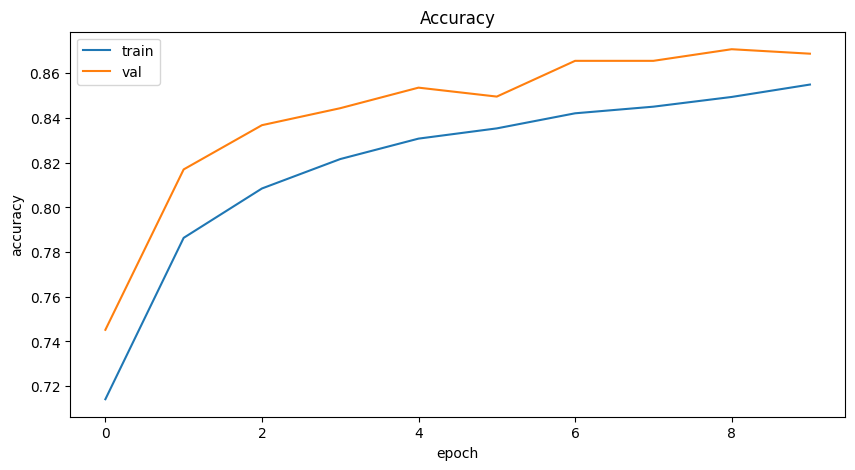

In [162]:
history_dropout = model_dropout.fit(X_train, y_train,
                                    epochs=epochs,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val))

plot_history(history_dropout.history)

Podobnie jak na poprzedniej liście (w pyTorch) wykorzystaj **wczesne zatrzymywanie** (ang. *earlystopping*). Proces uczenia zostanie przerwany w momencie, kiedy poprawianie się monitorowanej metryki przez określoną liczbę epok się nie zmienia. Takie podejście pozwala na brak konieczności ponownego treningu sieci ze zmniejszoną liczbą epok, kiedy początkowo ustawiona liczba epok jest zbyt duża i model zaczyna się przetrenowywać. 

> [Dokumentacja - wczesne zatrzymanie](https://keras.io/api/callbacks/early_stopping/)


W połączeniu z wczesnym zatrzymywaniem treningu, stosuje się zazwyczaj wywołanie *ModelCheckpoint*, które umożliwia zapisanie stanu modelu podczas trenowania (można zapisać tylko najlepszą wersję, którą udało się uzyskać - z najlepszą wydajnością na koniec bieżącej epoki).

> [Dokumentacja - ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/)

Przeprowadź trening prostego modelu *model_simple*,
 zwiększając liczbę epok do 30 oraz wykorzystując wcześniejsze 
zatrzymanie modelu, monitorując błąd na zbiorze walidacyjnym - jeśli nie
 zmienia się przez 4 epoki - zakończ uczenie. Dodatkowo wykorzystaj 
zapisywanie modelu - zapisując tylko najlepiej wytrenowaną wersję 
modelu, monitorując również błąd na zbiorze walidacyjnym. Ile epok 
trwało uczenie modelu?

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6568 - accuracy: 0.8359 - val_loss: 0.3727 - val_accuracy: 0.8694
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3089 - accuracy: 0.8875 - val_loss: 0.3230 - val_accuracy: 0.8838
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9007 - val_loss: 0.3261 - val_accuracy: 0.8832
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2459 - accuracy: 0.9080 - val_loss: 0.3125 - val_accuracy: 0.8884
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2241 - accuracy: 0.9171 - val_loss: 0.2987 - val_accuracy: 0.8914
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2102 - accuracy: 0.9216 - val_loss: 0.2904 - val_accuracy: 0.9016
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1904 - accuracy: 0.9292 - val_loss: 0.2994 - val_accuracy:

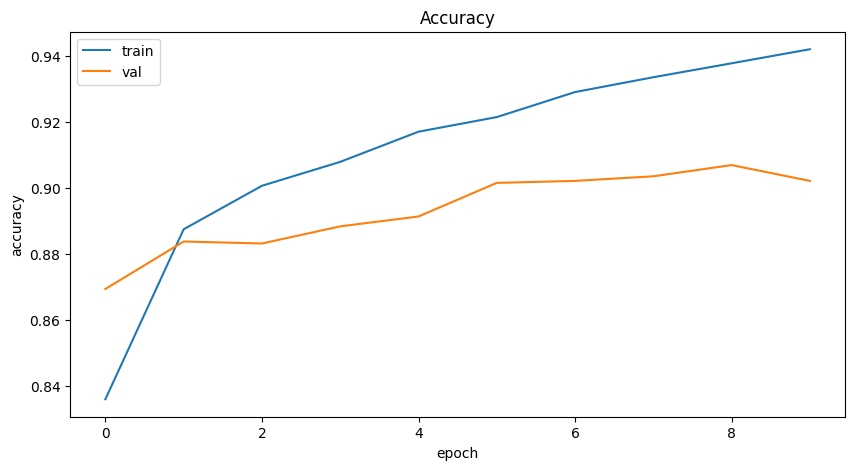

In [163]:
# tutaj umieść rozwiązanie

# definicja modelu
model_simple = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=2, activation='relu', 
                           input_shape=(img_width, img_height, img_depth), padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),  # spłaszczenie danych do wykorzystania warstwy gęstej
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
  ])

model_simple.compile(
    # wybór optymalizatora
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    # miara, którą chcemy monitorować
    metrics=['accuracy']
)

# wybór parametrów uczenia
epochs = 30

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

checkpoint_filepath = './checkpoint.weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               monitor='val_loss',
                                                               mode='min',
                                                               save_weights_only=True,
                                                               save_best_only=True)

history_stop = model_simple.fit(X_train, y_train,
                                epochs=epochs,
                                batch_size=batch_size,
                                callbacks=[callback, model_checkpoint_callback],
                                validation_data=(X_val, y_val))

plot_history(history_stop.history)

### **2. Uczenie transferowe**

W uczeniu transferowym wykorzystuje się wiedzę zdobytą przy rozwiązywaniu jednego problemu (na przykład klasyfikacji różnych gatunków zwierząt) i zastosowaniu jej do innego, powiązanego z nim problemu (na przykład klasyfikacja ras konkretnego gatunku). 

Mając mały zbiór danych lub mając małe zasoby obliczeniowe - warto zastosować technikę uczenia transferowego. 

Model, który został wcześniej przetrenowany z wykorzystaniem dużego zbioru danych, staje się punktem startowym w uczeniu innych zadań, na przykład klasyfikacji obrazu. 

Wykorzystując zbiór danych Recyclable Materials , który zawiera
 282 obrazów należące do 6 klas, wczytaj dane z podziałem na zbiór 
treningowy i walidacyjny (zbiór walidacyjny wyodrębnij ze zbioru 
treningowego - 20%). Etykiety powinny być generowane na podstawie 
struktury katalogów, a rozdzielczość obrazów - 224x224 piksele.

> Dataset: https://www.kaggle.com/datasets/minhoheo/recyable-materials ([local copy)](https://cs.pwr.edu.pl/zawada/umsi/download/data)

> Dokumentacja: [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [164]:
# uzupełnij kod poniżej
# train_dataset i val_dataset

train_dataset, val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    './archive/recyclable_materials/',
    seed=1,
    validation_split=0.2,
    subset='both',
    image_size=(224, 224)
)

Found 282 files belonging to 6 classes.
Using 226 files for training.


Using 56 files for validation.


In [165]:
mobilenet_base_scratch = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights=None)

mobilenet_base_scratch.trainable = True

mobilenet_base_scratch.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_24 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_24[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

Dostosujmy dane do użycia ich w tworzonym modelu - normalizacja danych do zakresu [-1,1], dodanie augmentacji.

In [166]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
data_augm = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ])

In [167]:
input = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(input)
x = data_augm(x)
x = mobilenet_base_scratch(x, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
output = tf.keras.layers.Dense(6)(x)

mobilenet_pm_scratch = tf.keras.Model(input, output)

adam = tf.keras.optimizers.Adam(learning_rate=1e-4)
mobilenet_pm_scratch.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])
print("Output shape:", output.shape)
mobilenet_pm_scratch.summary()

Output shape: (None, 6)
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_8 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_8 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 sequential_47 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                   

W kolejnym kroku uruchamiamy trening modelu - 15 epok, wykorzystując do walidacji wydzielone dane walidacyjne.

In [168]:
epochs_mobilenet = 15
history_scratch = mobilenet_pm_scratch.fit(
    train_dataset,
    epochs=epochs_mobilenet,
    validation_data=val_dataset)

Epoch 1/15


8/8 [==============================] - 28s 2s/step - loss: 1.8620 - accuracy: 0.1947 - val_loss: 1.7395 - val_accuracy: 0.1964
Epoch 2/15
8/8 [==============================] - 16s 1s/step - loss: 1.7224 - accuracy: 0.2920 - val_loss: 1.7395 - val_accuracy: 0.2321
Epoch 3/15
8/8 [==============================] - 16s 1s/step - loss: 1.7116 - accuracy: 0.3142 - val_loss: 1.7069 - val_accuracy: 0.2321
Epoch 4/15
8/8 [==============================] - 16s 1s/step - loss: 1.6654 - accuracy: 0.3540 - val_loss: 1.6857 - val_accuracy: 0.2679
Epoch 5/15
8/8 [==============================] - 16s 1s/step - loss: 1.6957 - accuracy: 0.3142 - val_loss: 1.6648 - val_accuracy: 0.3036
Epoch 6/15
8/8 [==============================] - 17s 1s/step - loss: 1.5905 - accuracy: 0.3540 - val_loss: 1.6859 - val_accuracy: 0.3036
Epoch 7/15
8/8 [==============================] - 17s 1s/step - loss: 1.6449 - accuracy: 0.3319 - val_loss: 1.6175 - val_accuracy: 0.3214
Epoch 8/15
8/8 [=============================

Wyświetlmy na wykresie zmianę dokładności klasyfikacji dla danych walidacyjnych oraz testowych.

Text(0.5, 0.98, 'Zmiana dokładności w trakcie treningu')

Text(0.5, 0, 'epoka')

Text(0, 0.5, 'miara - dokładność')

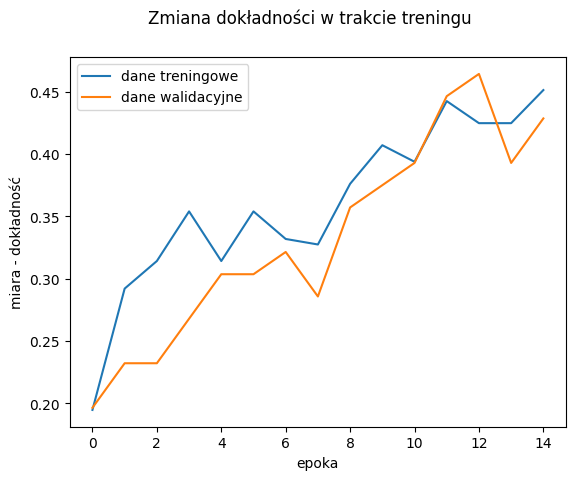

In [169]:
import matplotlib.pyplot as plt

figure = plt.figure()
figure.suptitle("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history_scratch.history['accuracy'])
plt.plot(history_scratch.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

Stwórz nowy model, wykorzystując model MobileNetV2 z wagami ImageNet,
ale dla pierwszych 50 warstw zablokuj możliwość ich treningu. Podobnie 
jak w poprzednim podejściu wytrenuj go, wykorzystującą tę samą ilość 
epok. Wyświetl wykres zmiany dokładności klasyfikacji dla danych 
treningowych i testowych oraz porównaj uzyskane wyniki z podejściem 
trenowania tego modelu od podstaw.

In [170]:
# tutaj umieść rozwiązanie

mobilenet_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet')

mobilenet_model.trainable = True

for layer in mobilenet_model.layers[:50]:
    layer.trainable = False

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
data_augm = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ])

input = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(input)
x = data_augm(x)
x = mobilenet_model(x, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
output = tf.keras.layers.Dense(6)(x)

mobilenet_pm = tf.keras.Model(input, output)

adam = tf.keras.optimizers.Adam(learning_rate=1e-4)
mobilenet_pm.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])
print("Output shape:", output.shape)



Output shape: (None, 6)


Epoch 1/15
8/8 [==============================] - 21s 824ms/step - loss: 2.0694 - accuracy: 0.2124 - val_loss: 1.3152 - val_accuracy: 0.4643
Epoch 2/15
8/8 [==============================] - 7s 559ms/step - loss: 1.0772 - accuracy: 0.6018 - val_loss: 0.9566 - val_accuracy: 0.7321
Epoch 3/15
8/8 [==============================] - 6s 564ms/step - loss: 0.6676 - accuracy: 0.7965 - val_loss: 0.7316 - val_accuracy: 0.8571
Epoch 4/15
8/8 [==============================] - 6s 569ms/step - loss: 0.5029 - accuracy: 0.8319 - val_loss: 0.5981 - val_accuracy: 0.8571
Epoch 5/15
8/8 [==============================] - 6s 569ms/step - loss: 0.3871 - accuracy: 0.8938 - val_loss: 0.5037 - val_accuracy: 0.8750
Epoch 6/15
8/8 [==============================] - 6s 576ms/step - loss: 0.2977 - accuracy: 0.9159 - val_loss: 0.4470 - val_accuracy: 0.8750
Epoch 7/15
8/8 [==============================] - 6s 562ms/step - loss: 0.2624 - accuracy: 0.9204 - val_loss: 0.3952 - val_accuracy: 0.8929
Epoch 8/15
8/8 [===

Text(0.5, 0.98, 'Zmiana dokładności w trakcie treningu')

Text(0.5, 0, 'epoka')

Text(0, 0.5, 'miara - dokładność')

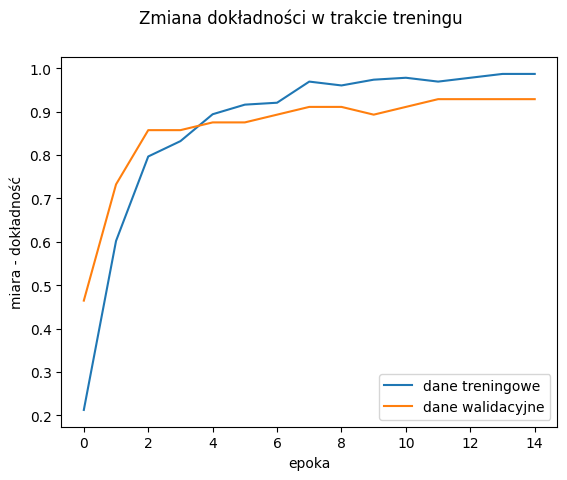

In [171]:
epochs_mobilenet = 15
history = mobilenet_pm.fit(
    train_dataset,
    epochs=epochs_mobilenet,
    validation_data=val_dataset)

figure = plt.figure()
figure.suptitle("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

# Zadanie 2 (10pt)

Zaprogramuj i pokaż wykorzystanie klasycznych architektur sieci tzw. backbone


## Klasyczne sieci typu backbone

Sieci neuronowe znalazły zastosowanie w wielu różnych klasach problemach nierzadko znacznie przewyższając osiągnięciami poprzednio wykorzystywane modele. Bardziej wymagające problemy pociągnęły za sobą bardziej wyrafinowane modele neuronowe, które natomiast stawały się większe pod względem liczby parametrów, warstw i stopnia zaawansowania.

Jednym z bardziej eksplorowanych działów głębokiego uczenia jest wykorzystanie modeli neuronowych w zastosowaniach wizyjnych. Poniżej przedstawiony został graf zależności pomiędzy rozmiarami popularnych modeli neuronowych wykorzystywanych najczęściej w widzeniu komputerowym a ich trafnością klasyfikacji (zastosowanie: klasyfikacja obrazów, uczenie nadzorowane).

Źródło: "An Analysis of Deep Neural Network Models for Practical Applications", Alfredo Canziani, Adam Paszke, Eugenio Culurciello



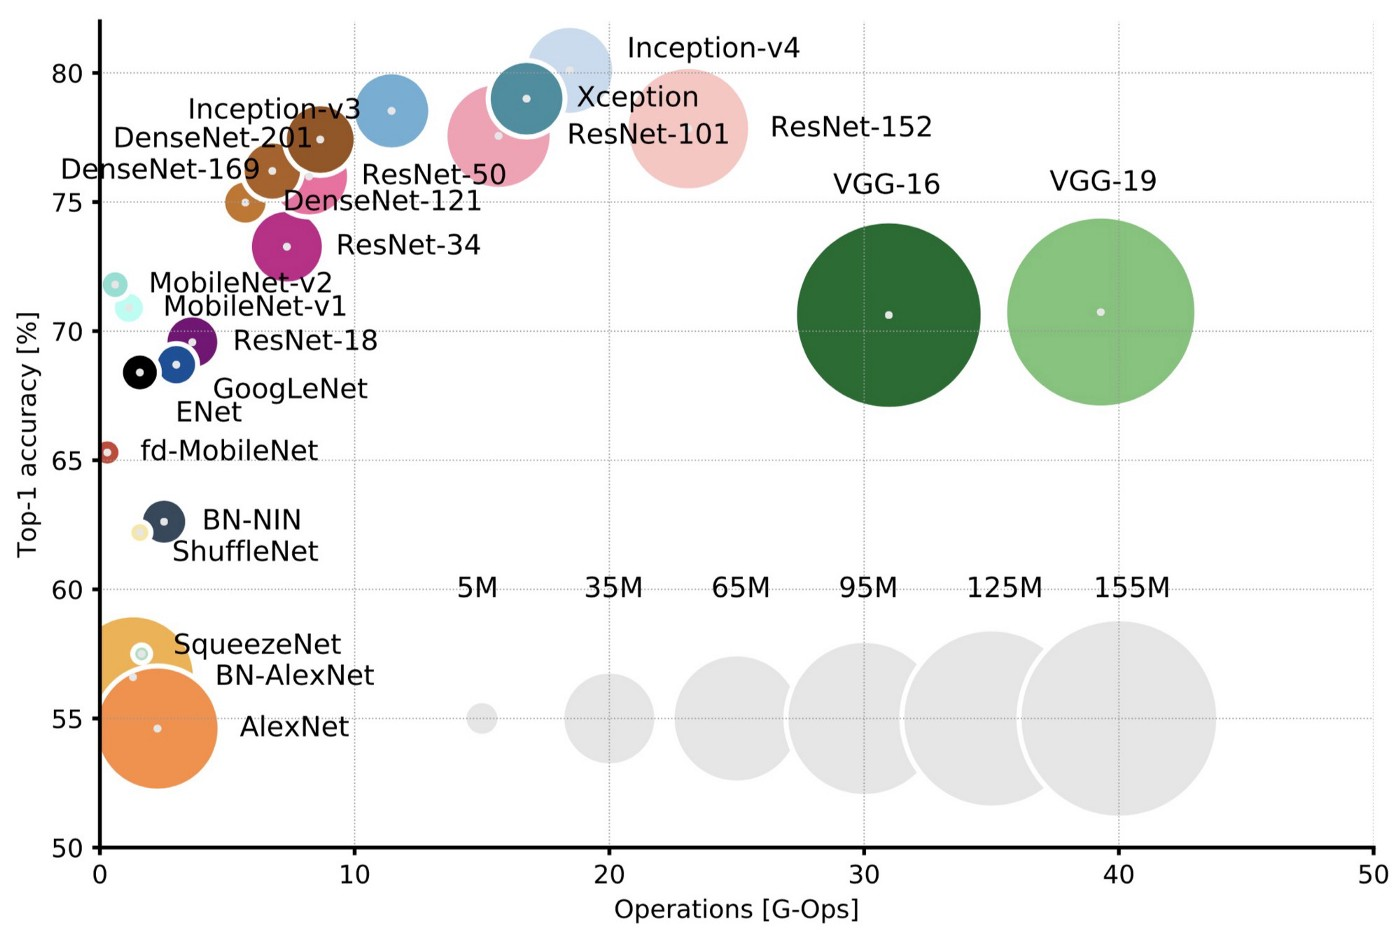

Modele liczące miliony operacji i miliony parametrów okazały się bardzo skutecznymi narzędziami do takich problemów jak klasyfikacja, detekcja obiektów czy tłumaczenie tekstów. Jednak ich rozmiar pociąga niewspółmiernie rosnącą złożoność obliczeniową, czasową i pamięciową w stosunku do skuteczności działania. Stąd, powstało zapotrzebowanie na opracowywanie nie głębszych, a *inteligentniejszych* modeli neuronowych. Takich, które posiadają względnie niską złożoność obliczeniową i osiągają podobne lub lepsze wyniki niż dotychczas wykorzystywane.

Ponieważ opracowanie zupełnie nowego modelu, bijącego poprzednie pod względem skuteczności działania jest bardzo trudne i kosztowne, rozwój sieci zaczął opierać się o stopniowy rozwój przyrostowy do istniejących już modeli. Aby nie wykonywać za każdym razem procesu uczenia tych samych modeli neuronowych zaczęto wykorzystywać poprzednio wyuczone modele, tym samym skupiając się wokół tematyki **transfer learning** oraz **fine-tuning**.

Komponenty neuronowe na których budowane są nowe funkcjonalności nazywane są **backbone-ami**, wykorzystanie modeli neuronowych nauczonych na **innej klasie problemu** do rozwiązania nowego problemy nazywa się **transfer learningiem**, natomiast proces dostrajania wstępnie nauczonych modeli neuronowych nazywa się **fine-tuningiem**.




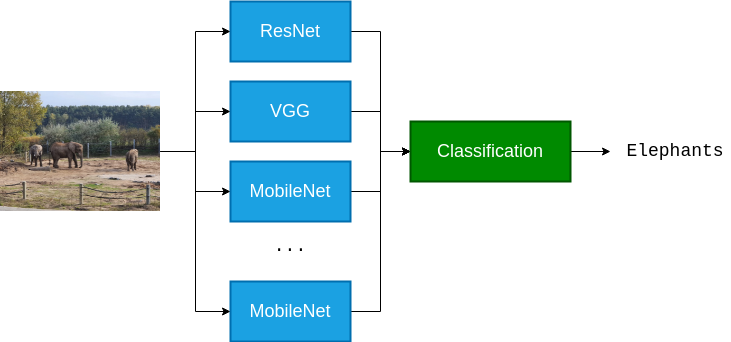

Takie modele jak ResNet, VGG, BERT czy Faster-RCNN są w praktyce bardzo 
często wykorzystywane, nawet wielokrotnie w jednym dużym modelu 
neuronowym. Stąd, popularne biblioteki do uczenia maszynowego zazwyczaj 
zawierają gotową implementację niektórych z nich. Dodatkowo, popularne 
stały się takie repozytoria jak TensorHub, HuggingFace czy ModelZoo do 
współdzielenia istniejących implementacji popularnych modeli neuronowych
 razem z ich pretrenowanymi wersjami.

## Keras

Keras w swojej implementacji zawiera gotowe definicje popularnych modeli (głównie do przetwarzania wizyjnego, w szczególności klasyfikacji) wraz z możliwością pobrania popularnych pretrenowanych wersji modeli.

Do wykonania tego zadania wykorzystaj TensorFlow oraz jego dostosowany moduł.

Keras zawiera wewnętrzny moduł `applications`, w którym można znaleźć definicje klas popularnych modeli neuronowych. Co jest bardzo ważne, modele te dziedziczą po klasie `tf.keras.Model`, dzięki czemu możliwa jest łatwa integracja własnego kodu.

In [172]:
model_res = tf.keras.applications.ResNet50V2(weights='imagenet')
model_nas = tf.keras.applications.NASNetLarge(weights='imagenet')
model_dense = tf.keras.applications.DenseNet121(weights='imagenet')
model_vgg = tf.keras.applications.VGG16(weights='imagenet')
model_mobile = tf.keras.applications.MobileNetV2(weights='imagenet')

Modele zaimplementowane w Keras posiadają zestaw parametrów wejściowych, z których najważniejsze to:
- `weights` - w przypadku podania tego parametru Keras pobierze pretrenowany model na podanym zbiorze danych (obecnie możliwe wartości to `None` - czysty model oraz `imagenet` - model pretrenowany na zbiorze ImageNet),
- `include_top` - określenie czy będzie wykorzystywany końcowy moduł modelu odpowiedzialny za klasyfikację obrazów, w przypadku `include_top=False` model będzie zwracał **wektory osadzenia (embeddings)** obrazów,

In [173]:
!wget https://drive.google.com/uc?id=1jq6s6lP6B6CeqTDaa5uOrPy5ErSASiBj -O elephants.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.


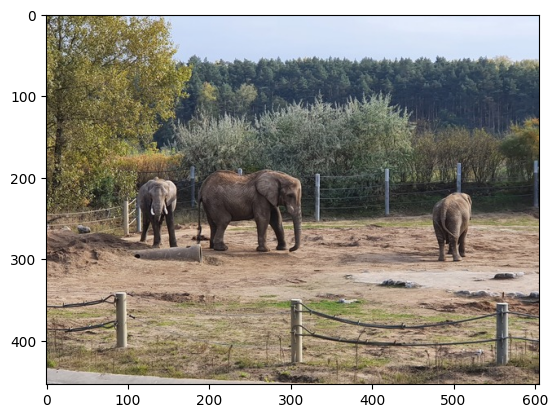

In [177]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
elephants = cv2.imread('./data/elephants.jpg')
elephants = cv2.cvtColor(elephants, cv2.COLOR_BGR2RGB)
elephants = tf.image.convert_image_dtype(elephants, tf.float32)
plt.imshow(elephants)

Np. dla ResNet50v2 sprawdzać możemy tak
```python
tf.keras.applications.resnet_v2.decode_predictions(output.numpy())
```

W tym zadaniu należy wykorzystać każdy z modeli `ResNet50V2`, `VGG16`, `MobileNetV2`, ... przetrenowany na zbiorze `ImageNet` i porównać te modele na zdjęciu 'elephants' i kilku innych wybranych dowolnie z sieci/aparatu itp. Następnie wykonać podobny diagram/tabelkę porównującą złożoność modeli. Zbiór testowy nie musi być duży, ale dobrze żeby miał kilka kategorii.

In [189]:
# tutaj wpisz rozwiązanie

def get_img(path, size):
    img = tf.keras.utils.load_img(path, target_size=size)
    img = tf.keras.utils.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

paths = ['data/elephants.jpg',
         'data/fiat.jpg',
         'data/fox.jpg',
         'data/guitar.jpg',
         'data/hammer.png',
         'data/horse.jpg']

for path in paths:
    print(path)

    print('resnet_v2')
    tf.keras.applications.resnet_v2.decode_predictions(
        model_res.predict(
            tf.keras.applications.resnet_v2.preprocess_input(
                get_img(path, (224,224))),
                verbose=False),
            top=3)

    print('nasnet')
    tf.keras.applications.nasnet.decode_predictions(
        model_nas.predict(
            tf.keras.applications.nasnet.preprocess_input(
                get_img(path, (224,224))), 
                verbose=False), 
            top=3)

    print('densenet')
    tf.keras.applications.densenet.decode_predictions(
        model_dense.predict(
            tf.keras.applications.densenet.preprocess_input(
                get_img(path, (224,224))), 
                verbose=False), 
            top=3)

    print('vgg16')
    tf.keras.applications.vgg16.decode_predictions(
        model_vgg.predict(
            tf.keras.applications.vgg16.preprocess_input(
                get_img(path, (224,224))), 
                verbose=False), 
            top=3)

    print('mobilenet_v2')
    tf.keras.applications.mobilenet_v2.decode_predictions(
        model_mobile.predict(
            tf.keras.applications.mobilenet_v2.preprocess_input(
                get_img(path, (224,224))), 
                verbose=False), 
            top=3)

data/elephants.jpg
resnet_v2


[[('n02504458', 'African_elephant', 0.8731352),
  ('n02504013', 'Indian_elephant', 0.117335014),
  ('n01871265', 'tusker', 0.009286776)]]

nasnet


[[('n02504458', 'African_elephant', 0.99555653),
  ('n01871265', 'tusker', 0.0024692963),
  ('n02504013', 'Indian_elephant', 0.0019730027)]]

densenet


[[('n02504458', 'African_elephant', 0.6593371),
  ('n02410509', 'bison', 0.07466328),
  ('n02504013', 'Indian_elephant', 0.06424566)]]

vgg16


[[('n02504458', 'African_elephant', 0.7341057),
  ('n02504013', 'Indian_elephant', 0.18437675),
  ('n01871265', 'tusker', 0.076665804)]]

mobilenet_v2


[[('n02504458', 'African_elephant', 0.58376896),
  ('n02437312', 'Arabian_camel', 0.063298814),
  ('n02504013', 'Indian_elephant', 0.055103593)]]

data/fiat.jpg
resnet_v2


[[('n04461696', 'tow_truck', 0.32815987),
  ('n03930630', 'pickup', 0.3129001),
  ('n02930766', 'cab', 0.18907766)]]

nasnet


[[('n03930630', 'pickup', 0.9800473),
  ('n02930766', 'cab', 0.010817832),
  ('n03769881', 'minibus', 0.0076886355)]]

densenet


[[('n03594945', 'jeep', 0.30513602),
  ('n02930766', 'cab', 0.23858778),
  ('n03930630', 'pickup', 0.1835763)]]

vgg16


[[('n03930630', 'pickup', 0.21080197),
  ('n02930766', 'cab', 0.17905653),
  ('n04461696', 'tow_truck', 0.15375623)]]

mobilenet_v2


[[('n02930766', 'cab', 0.325268),
  ('n03930630', 'pickup', 0.17991224),
  ('n03384352', 'forklift', 0.067726396)]]

data/fox.jpg
resnet_v2


[[('n02119022', 'red_fox', 0.7132288),
  ('n02119789', 'kit_fox', 0.19033378),
  ('n02114855', 'coyote', 0.036916327)]]

nasnet


[[('n02119022', 'red_fox', 0.72361463),
  ('n02119789', 'kit_fox', 0.27638155),
  ('n02114855', 'coyote', 6.995176e-07)]]

densenet


[[('n02119789', 'kit_fox', 0.5423612),
  ('n02119022', 'red_fox', 0.24435131),
  ('n02120505', 'grey_fox', 0.11504052)]]

vgg16


[[('n02137549', 'mongoose', 0.67719656),
  ('n02441942', 'weasel', 0.0719144),
  ('n02119789', 'kit_fox', 0.06521831)]]

mobilenet_v2


[[('n02119022', 'red_fox', 0.55153435),
  ('n02119789', 'kit_fox', 0.15851757),
  ('n02115913', 'dhole', 0.08291932)]]

data/guitar.jpg
resnet_v2


[[('n03272010', 'electric_guitar', 0.99997675),
  ('n02676566', 'acoustic_guitar', 2.2744458e-05),
  ('n04536866', 'violin', 2.2674955e-07)]]

nasnet


[[('n03272010', 'electric_guitar', 0.99977285),
  ('n02676566', 'acoustic_guitar', 0.0001930079),
  ('n04536866', 'violin', 2.1484399e-05)]]

densenet


[[('n03272010', 'electric_guitar', 0.9395018),
  ('n02676566', 'acoustic_guitar', 0.047515627),
  ('n04536866', 'violin', 0.010994463)]]

vgg16


[[('n03272010', 'electric_guitar', 0.97509444),
  ('n02676566', 'acoustic_guitar', 0.022676405),
  ('n03929660', 'pick', 0.0014010575)]]

mobilenet_v2


[[('n03272010', 'electric_guitar', 0.8536633),
  ('n02676566', 'acoustic_guitar', 0.016875532),
  ('n03929660', 'pick', 0.010238422)]]

data/hammer.png
resnet_v2


[[('n03481172', 'hammer', 0.93744004),
  ('n03804744', 'nail', 0.013655973),
  ('n03498962', 'hatchet', 0.006044546)]]

nasnet


[[('n03481172', 'hammer', 0.99987674),
  ('n03498962', 'hatchet', 0.000113915616),
  ('n04208210', 'shovel', 9.102672e-06)]]

densenet


[[('n03481172', 'hammer', 0.90450144),
  ('n04067472', 'reel', 0.026092367),
  ('n03995372', 'power_drill', 0.010539798)]]

vgg16


[[('n03481172', 'hammer', 0.17686686),
  ('n03876231', 'paintbrush', 0.07678343),
  ('n01729977', 'green_snake', 0.07606865)]]

mobilenet_v2


[[('n03481172', 'hammer', 0.27604243),
  ('n03498962', 'hatchet', 0.062459912),
  ('n01729977', 'green_snake', 0.0325108)]]

data/horse.jpg
resnet_v2


[[('n03388043', 'fountain', 0.94704604),
  ('n03743016', 'megalith', 0.017701114),
  ('n02504013', 'Indian_elephant', 0.006334359)]]

nasnet


[[('n03388043', 'fountain', 0.9520305),
  ('n04604644', 'worm_fence', 0.008041578),
  ('n02113799', 'standard_poodle', 0.0042112744)]]

densenet


[[('n02397096', 'warthog', 0.23867443),
  ('n02398521', 'hippopotamus', 0.21665129),
  ('n03388043', 'fountain', 0.11491043)]]

vgg16


[[('n03388043', 'fountain', 0.8837569),
  ('n02894605', 'breakwater', 0.035585254),
  ('n03743016', 'megalith', 0.01933333)]]

mobilenet_v2


[[('n03388043', 'fountain', 0.7688338),
  ('n01665541', 'leatherback_turtle', 0.052621786),
  ('n02398521', 'hippopotamus', 0.011507837)]]

In [190]:
from io import StringIO

s = StringIO()

def print_params(model):
    model.summary(print_fn=lambda x: print(x, file=s))
    params = s.getvalue()
    idxs = [i for i,c in enumerate(params) if c=='\n']
    print(params[idxs[-5]:idxs[-2]])

print_params(model_res)
print_params(model_nas)
print_params(model_dense)
print_params(model_vgg)
print_params(model_mobile)


Total params: 25613800 (97.71 MB)
Trainable params: 25568360 (97.54 MB)
Non-trainable params: 45440 (177.50 KB)

Total params: 88949818 (339.32 MB)
Trainable params: 88753150 (338.57 MB)
Non-trainable params: 196668 (768.23 KB)

Total params: 8062504 (30.76 MB)
Trainable params: 7978856 (30.44 MB)
Non-trainable params: 83648 (326.75 KB)

Total params: 138357544 (527.79 MB)
Trainable params: 138357544 (527.79 MB)
Non-trainable params: 0 (0.00 Byte)

Total params: 3538984 (13.50 MB)
Trainable params: 3504872 (13.37 MB)
Non-trainable params: 34112 (133.25 KB)
